<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Outliers_Using_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find Oultiers using "IQR"
- Find the quantiles (**Q1** & **Q3**) 
- Calculate the IQR using Q1 & Q3
- Calculate the lower limit (**LL**) and upper limit (**UL**)
- Check the outliers using LL and UL
- View total outliers
- Remove outliers if exists
- Create a new DF after removing outliers


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('./smart.csv')
df.head()

,dist,calc
0,53.426804,80.166275
1,68.777596,44.502538
2,61.530358,65.101712
3,62.562382,40.599538
4,47.475640,65.562301


In [3]:
df.shape

(99, 2)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dist,99.0,60.925810,17.852208,32.669044,47.793125,58.164540,72.815381,118.591217
calc,99.0,61.348229,18.135556,25.128485,49.221826,57.788224,72.179542,114.853871


## Find the quantiles

In [5]:
# Q1 (first quantile)
Q1 = df.dist.quantile(.25)

# Q2 (median)
Q2 = df.dist.quantile(.5)

# Q3 (third quantile)
Q3 = df.dist.quantile(.75)

print('Q1', Q1)
print('Q2', Q2)
print('Q3', Q3)

Q1 47.79312514981806
Q2 58.16454011019286
Q3 72.81538117508515


## Calculate the IQR using Q1 & Q3

In [6]:
IQR = Q3 - Q1
print('IQR: ', IQR)

IQR:  25.02225602526709


## Calculate the lower limit (LL) and upper limit (UL)

In [7]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print('Lower Limit (LL): ', LL)
print('Upper Limit (UL): ', UL)

Lower Limit (LL):  10.259741111917428
Upper Limit (UL):  110.34876521298578


## Check the outliers using LL and UL

In [8]:
# Find outliers that are less than LL
Lo = df[df.dist < LL]
Lo

,dist,calc


In [9]:
# Find outliers that are greater than UL
Go = df[df.dist > UL]
Go

,dist,calc
41,118.591217,53.660932
87,115.244153,68.319361


## Visualize total outliers

In [10]:
outliers = df[(df.dist < LL) | (df.dist > UL)]
outliers

,dist,calc
41,118.591217,53.660932
87,115.244153,68.319361


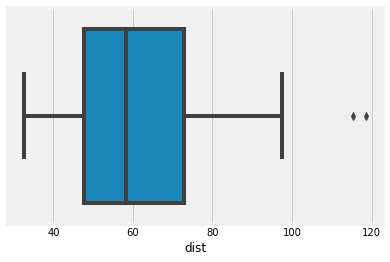

In [12]:
sns.boxplot(x=df.dist)